# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 14

Group Members:
- Mohammad Nugraha Eka Prawira (13522001)
- Muhammad Al Thariq Fairuz (13522027)
- Randy Verdian (13522067)
- Emery Fathan Zwageri (13522079)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## Import Dataset

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1QF6GIBYfh3A5Mf2KuMaWTjHhsAGV9j3K')

In [3]:
test = pd.read_csv('https://drive.google.com/uc?id=1nS08aIaGgQsmkK9byoLwxgK-LxKUOb0A')

In [4]:
# drop the label in df
df.drop("label", axis = 1, inplace = True)

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

#### Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   state              166536 non-null  object 
 1   dur                166619 non-null  float64
 2   sbytes             166780 non-null  float64
 3   dbytes             166472 non-null  float64
 4   sttl               166516 non-null  float64
 5   dttl               166687 non-null  float64
 6   sloss              166547 non-null  float64
 7   dloss              166363 non-null  float64
 8   service            166550 non-null  object 
 9   sload              166555 non-null  float64
 10  dload              166504 non-null  float64
 11  spkts              166687 non-null  float64
 12  dpkts              166655 non-null  float64
 13  id                 175341 non-null  int64  
 14  is_sm_ips_ports    166595 non-null  float64
 15  ct_state_ttl       166706 non-null  float64
 16  ct

In [ ]:
cat_df = df.select_dtypes(include=['object'])
cat_df.describe()

,state,service,proto,attack_cat
count,166536,166550,166515,175341
unique,9,13,133,10
top,INT,-,tcp,Normal
freq,78148,89434,75902,56000


In [ ]:
num_df= df.select_dtypes(include=['int64', 'float64'])
num_df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
count,166619.000000,1.667800e+05,1.664720e+05,166516.000000,166687.000000,166547.000000,166363.000000,1.665550e+05,1.665040e+05,166687.000000,...,166486.000000,166556.000000,1.665500e+05,1.666030e+05,166495.000000,166634.000000,166607.000000,166505.000000,166605.000000,166746.000000
mean,1.359299,8.734079e+03,1.493589e+04,179.521944,79.584179,4.904790,6.971688,7.342186e+07,6.718596e+05,20.266134,...,124.161041,0.106193,2.157133e+03,4.993982e+03,604.891720,987.360974,87.763617,0.041331,0.021042,0.020402
std,6.485386,1.712289e+05,1.430150e+05,102.957427,110.494848,64.867849,51.801936,1.884564e+08,2.422879e+06,136.433895,...,258.265755,0.794070,5.509898e+04,4.506783e+04,4082.439167,7246.462797,987.040024,0.079428,0.043560,0.040619
min,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.303032e+04,0.000000e+00,2.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
50%,0.001548,4.500000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.714544e+05,1.426630e+03,2.000000,...,44.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.284723,0.006000,0.000000,0.000000,0.000000
75%,0.667311,1.418000e+03,1.096000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.807410e+04,12.000000,...,89.000000,0.000000,0.000000e+00,2.511184e+03,114.753348,55.205806,50.933127,0.065151,0.023235,0.038951
max,59.999989,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,...,1458.000000,172.000000,6.558056e+06,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884


#### Missing values

In [ ]:
df.isnull().sum()

,0
state,8805
dur,8722
sbytes,8561
dbytes,8869
sttl,8825
dttl,8654
sloss,8794
dloss,8978
service,8791
sload,8786


#### Unique Values

In [5]:
unique_values = df.nunique()
print(unique_values)

state                     9
dur                   70713
sbytes                 6997
dbytes                 6432
sttl                     11
dttl                      6
sloss                   394
dloss                   365
service                  13
sload                 77315
dload                 73756
spkts                   470
dpkts                   432
id                   175341
is_sm_ips_ports           2
ct_state_ttl              5
ct_flw_http_mthd         11
is_ftp_login              4
ct_ftp_cmd                4
ct_srv_src               52
ct_srv_dst               52
ct_dst_ltm               50
ct_src_ltm               50
ct_src_dport_ltm         47
ct_dst_sport_ltm         32
ct_dst_src_ltm           54
swin                     11
dwin                      7
stcpb                 71744
dtcpb                 71536
smean                  1356
dmean                  1322
trans_depth              11
response_body_len      2327
proto                   133
attack_cat          

In [ ]:
test.nunique()

,0
state,5
dur,10509
sbytes,2038
dbytes,1661
sttl,10
dttl,8
sloss,149
dloss,161
service,13
sload,11308


In [ ]:
df["is_ftp_login"].value_counts()

,count
is_ftp_login,
0.0,164251
1.0,2422
4.0,16
2.0,5


In [ ]:
test['is_ftp_login'].value_counts()

,count
is_ftp_login,
0.0,19296
1.0,286
2.0,2


In [ ]:
df['swin'].value_counts()

,count
swin,
0.0,90688
255.0,75904
168.0,1
103.0,1
87.0,1
167.0,1
192.0,1
45.0,1
42.0,1


In [ ]:
df['dwin'].value_counts()

,count
dwin,
0.0,91471
255.0,75086
48.0,1
37.0,1
70.0,1
244.0,1
40.0,1


#### Outliers

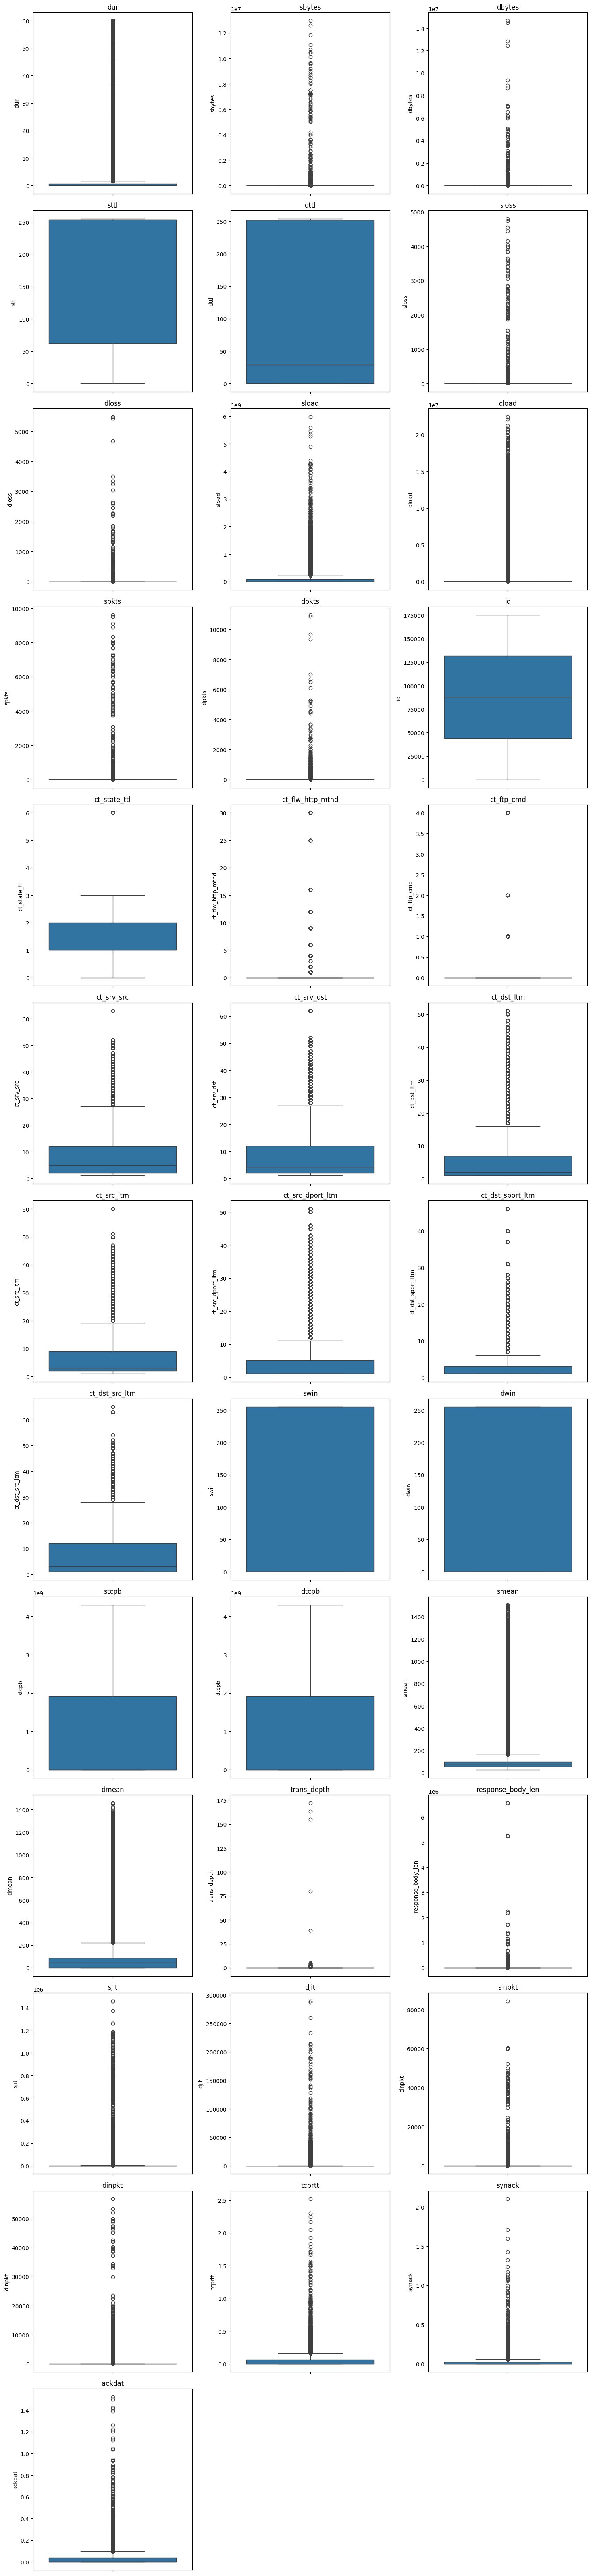

In [ ]:
# Outliers
num_df_without_binary = num_df.drop(['is_ftp_login', 'is_sm_ips_ports'], axis=1)

n_features = len(num_df_without_binary.columns)

n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.ravel()

for idx, column in enumerate(num_df_without_binary.columns):
    sns.boxplot(data=num_df_without_binary[column], ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [ ]:
for feat in num_df_without_binary.columns:
    Q1, Q3 = num_df_without_binary[feat].quantile([0.25, 0.75])
    IQR = Q3 - Q1

    outliers_count = num_df_without_binary[(num_df_without_binary[feat] < (Q1 - 1.5 * IQR)) |
                           (num_df_without_binary[feat] > (Q3 + 1.5 * IQR))][feat].count()

    print(f"Number of outliers in {feat}: {outliers_count} ({(outliers_count/len(num_df_without_binary))*100:.2f}%)")

In [ ]:
# Create plots for binary features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='is_ftp_login', data=df)
plt.title('Distribution of is_ftp_login')

plt.subplot(1, 3, 2)
sns.countplot(x='is_sm_ips_ports', data=df)
plt.title('Distribution of is_sm_ips_ports')

plt.subplot(1, 3, 3)
sns.countplot(x='label', data=df)
plt.title('Distribution of label')

plt.tight_layout()
plt.show()

#### Korelasi Numerikal vs Numerikal

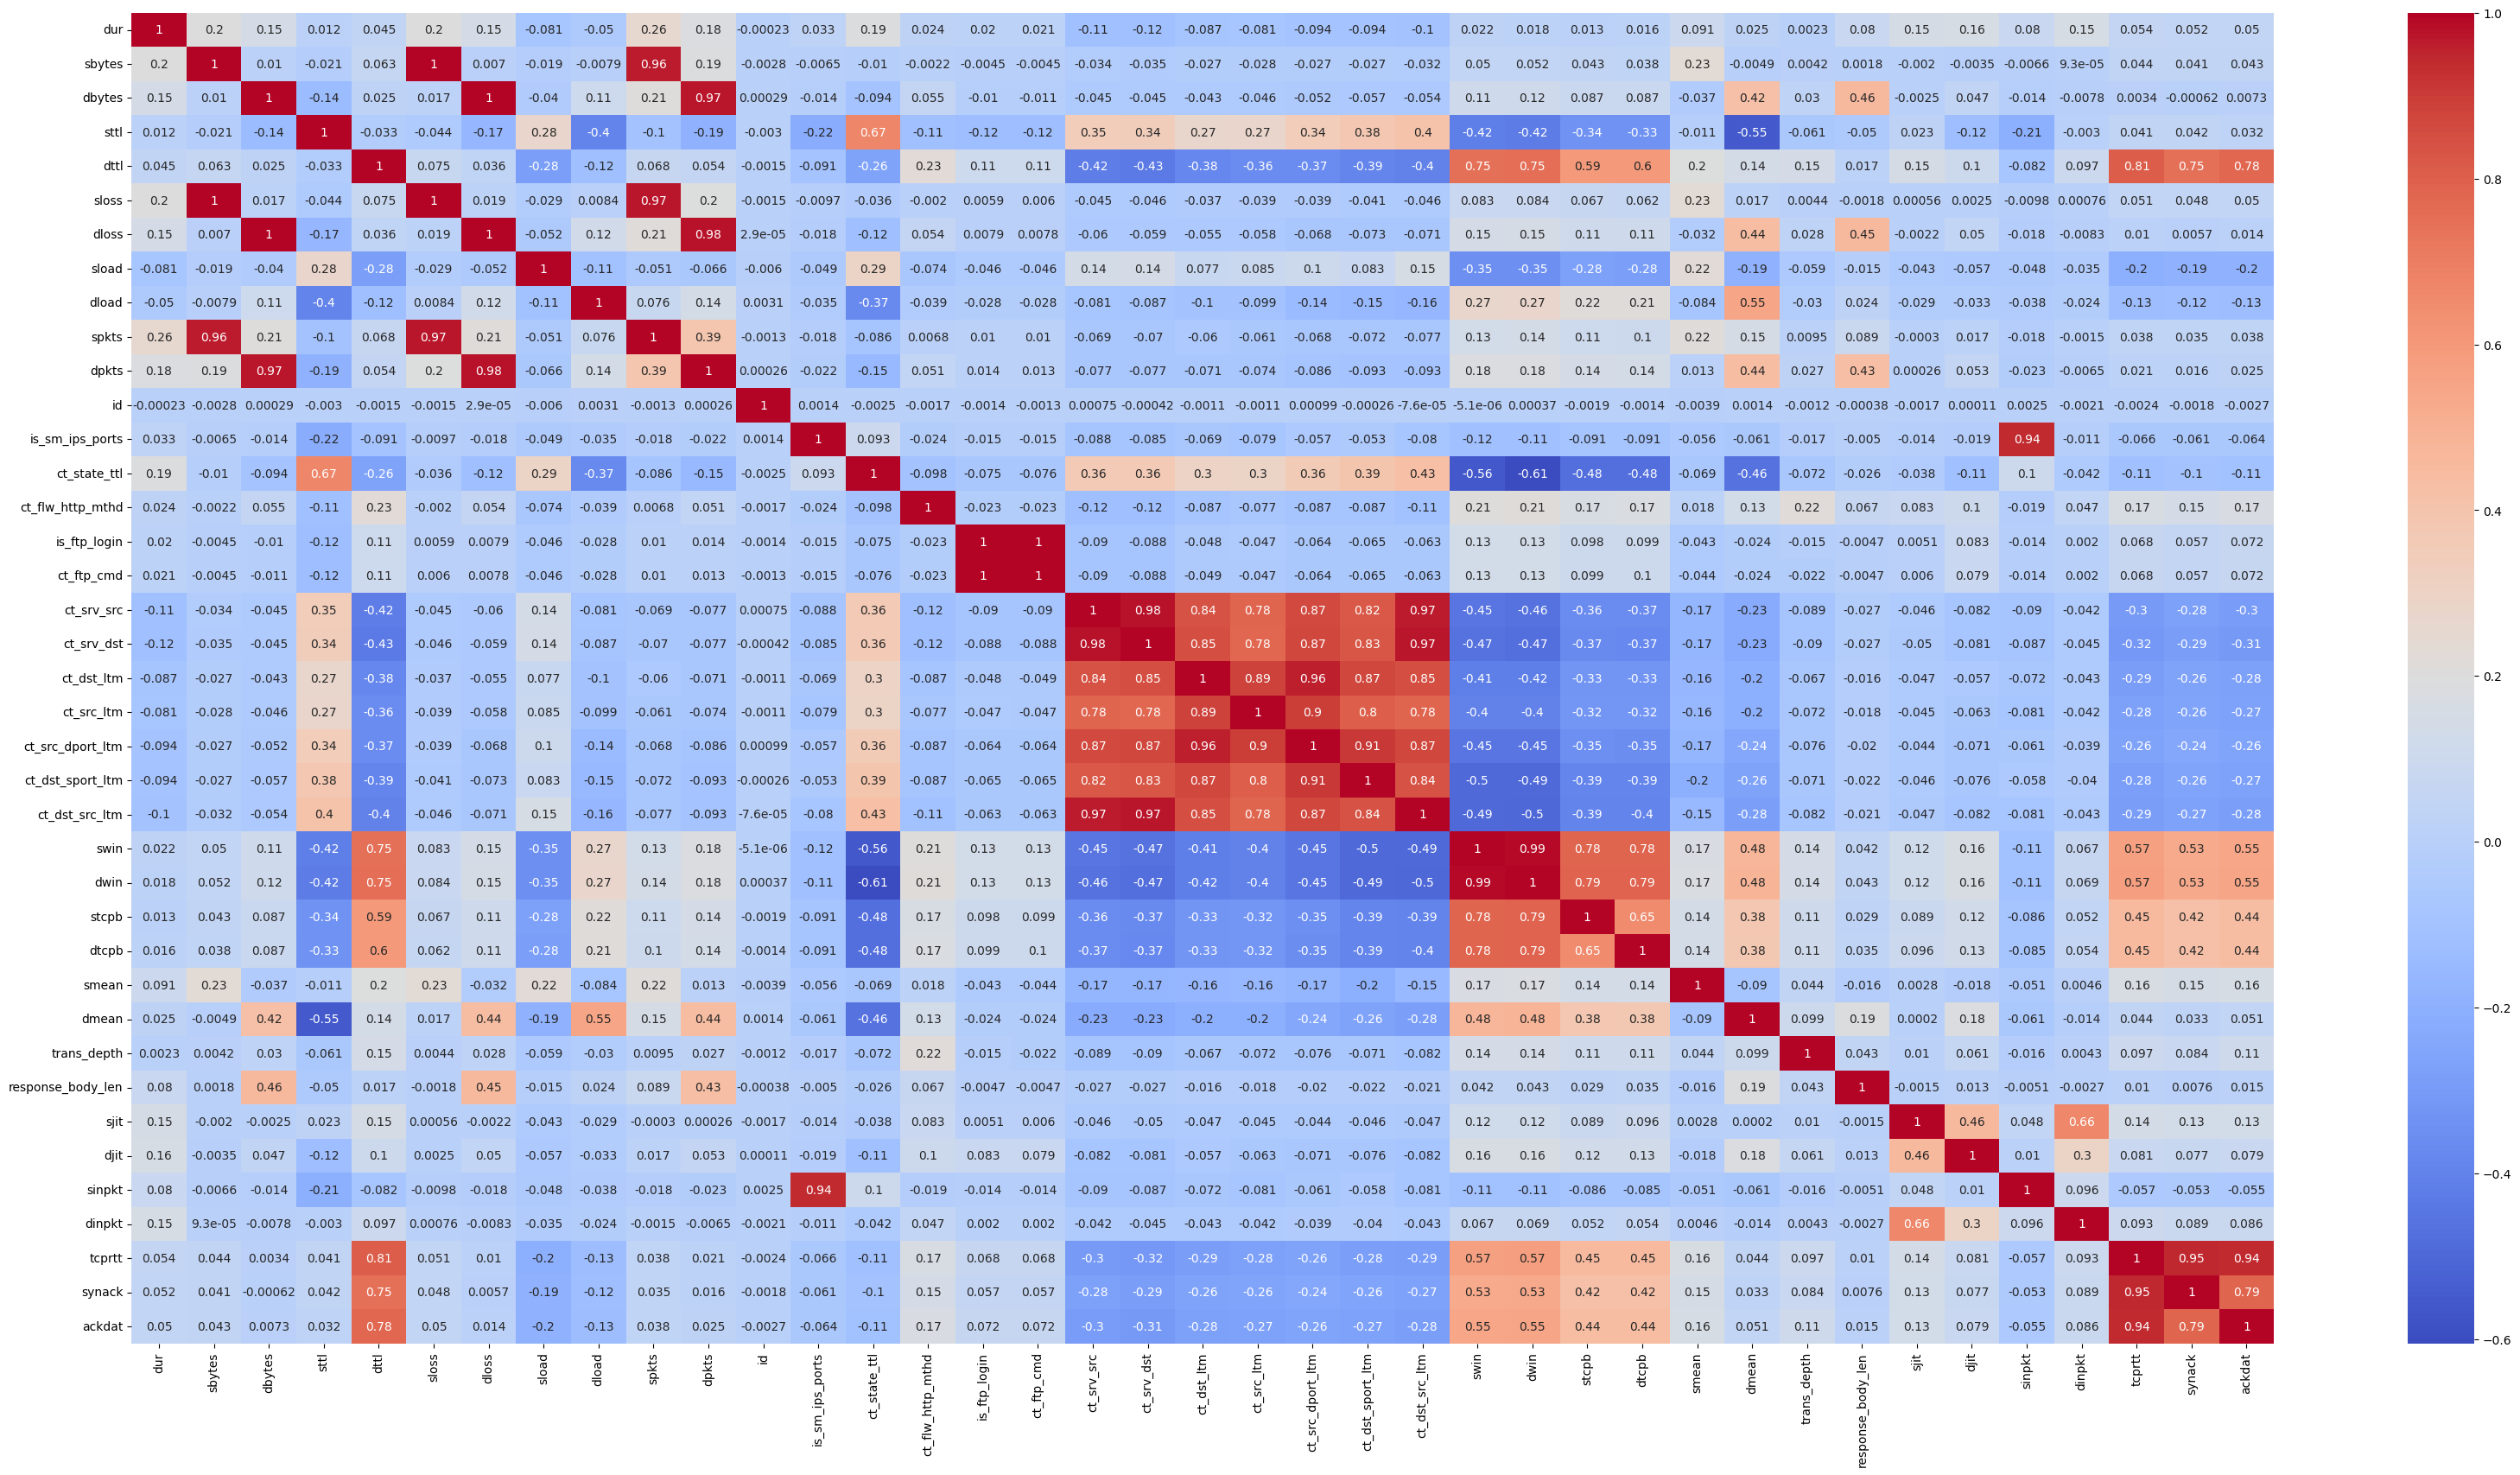

In [ ]:
plt.figure(figsize=(40,20))
sns.heatmap(df[num_df.columns].corr(), annot=True, cmap='coolwarm')
plt.show()

#### Korelasi Kategorikal vs Kategorikal

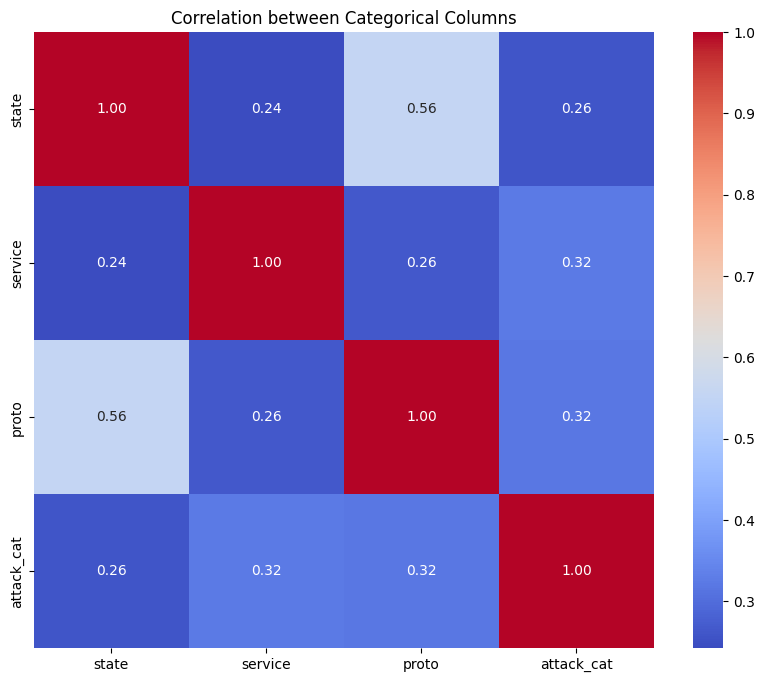

In [ ]:
def cramers_v(x, y):
    """Menghitung Cramér's V untuk dua kolom kategorikal."""
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def categorical_correlation(df, categorical_cols):
    """Menghitung korelasi antar kolom kategorikal menggunakan Cramér's V."""
    correlations = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 == col2:
                correlations.loc[col1, col2] = 1.0
            else:
                correlations.loc[col1, col2] = cramers_v(df[col1], df[col2])

    return correlations

# Pilih kolom kategorikal, selain 'attack_cat'
categorical_cols = df.select_dtypes(include=['object']).columns
# categorical_cols = categorical_cols[categorical_cols != 'attack_cat']

# Hitung korelasi antar kolom kategorikal
categorical_corr = categorical_correlation(df, categorical_cols)

# Visualisasi korelasi sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation between Categorical Columns')
plt.show()

Ada multicolinearity yang tinggi ditemukan, yaitu pada fitur proto dan state

#### Korelasi Numerical Fitur vs attack_cat

In [ ]:
le_attack_cat = LabelEncoder()
attack_cat_encoded = le_attack_cat.fit_transform(df['attack_cat'])

correlations = {}
for column in num_df.columns:
    correlation = pd.DataFrame({
        'numeric': num_df[column],
        'target': attack_cat_encoded
    }).corr().iloc[0,1]
    correlations[column] = correlation

# Sort and display correlations
correlations = pd.Series(correlations).sort_values(ascending=False)
correlations.name = 'Correlation with Attack Category'
correlations

,Correlation with Attack Category
dload,0.225852
ct_srv_src,0.133314
ct_srv_dst,0.128968
ct_dst_ltm,0.127527
swin,0.116150
dwin,0.108709
dmean,0.108470
is_sm_ips_ports,0.107436
sinpkt,0.099739
stcpb,0.086889


##### attack_cat vs proto

In [ ]:
contingency_table = pd.crosstab(df['attack_cat'], df['proto'])
print(contingency_table.to_string())

proto           3pc  a/n  aes-sp3-d  any  argus  aris   arp  ax.25  bbn-rcc  bna  br-sat-mon  cbt  cftp  chaos  compaq-peer  cphb  cpnx  crtp  crudp  dcn  ddp  ddx  dgp  egp  eigrp  emcon  encap  etherip  fc  fire  ggp  gmtp  gre  hmp  i-nlsp  iatp  ib  icmp  idpr  idpr-cmtp  idrp  ifmp  igmp  igp  il  ip  ipcomp  ipcv  ipip  iplt  ipnip  ippc  ipv6  ipv6-frag  ipv6-no  ipv6-opts  ipv6-route  ipx-n-ip  irtp  isis  iso-ip  iso-tp4  kryptolan  l2tp  larp  leaf-1  leaf-2  merit-inp  mfe-nsp  mhrp  micp  mobile  mtp  mux  narp  netblt  nsfnet-igp  nvp  ospf  pgm  pim  pipe  pnni  pri-enc  prm  ptp  pup  pvp  qnx  rdp  rsvp  rtp  rvd  sat-expak  sat-mon  sccopmce  scps  sctp  sdrp  secure-vmtp  sep  skip  sm  smp  snp  sprite-rpc  sps  srp  st2  stp  sun-nd  swipe  tcf    tcp  tlsp  tp++  trunk-1  trunk-2  ttp    udp  unas  uti  vines  visa  vmtp  vrrp  wb-expak  wb-mon  wsn  xnet  xns-idp  xtp  zero
attack_cat                                                                                 

##### attack_cat vs service

In [ ]:
contingency_table = pd.crosstab(df['attack_cat'], df['service'])
print(contingency_table)

#### Tabel Kontingensi Antar Kategorikal

##### state vs proto

In [ ]:
contingency_table = pd.crosstab(df['state'], df['proto'])
print(contingency_table.to_string())

##### state vs service

In [ ]:
contingency_table = pd.crosstab(df['state'], df['service'])
print(contingency_table.to_string())

service      -  dhcp    dns   ftp  ftp-data   http  irc  pop3  radius  smtp  snmp   ssh  ssl
state                                                                                       
CON       4913    27   6854     8         2     17    0     4       4    43     0     0    0
ECO         10     0      0     0         0      0    0     0       0     0     0     0    0
FIN      39852     0     43  3080      3609  16880   22   993       0  4541     0  1173   50
INT      38518    60  35528     0         0      0    0     0       6     0    74     0    0
PAR          1     0      0     0         0      0    0     0       0     0     0     0    0
REQ       1591     0    209     0         0      0    0     0       0     0     0     0    0
RST         60     0      0     0         0      2    0     0       0     1     0     8    0
URN          1     0      0     0         0      0    0     0       0     0     0     0    0
no           1     0      0     0         0      0    0     0       0 

##### service vs proto

In [ ]:
contingency_table = pd.crosstab(df['service'], df['proto'])
print(contingency_table.to_string())

##### attack_cat vs state

In [ ]:
contingency_table = pd.crosstab(df['attack_cat'], df['state'])
print(contingency_table)

state             CON  ECO    FIN    INT  PAR  REQ  RST  URN  no
attack_cat                                                      
Analysis            7    0    492   1265    0   20    0    0   0
Backdoor           53    0    243   1257    0   37    0    0   0
DoS               269    0   2005   8628    0  214    2    0   0
Exploits          530    0  17661  11570    0  316    6    0   0
Fuzzers            26    0  10657   5481    0  316    0    0   0
Generic            14    0    444  35626    0   11    1    0   0
Normal          10937   11  33516   5139    1  830   59    1   1
Reconnaissance     43    0   4602   4814    0   51    2    0   0
Shellcode           0    0    500    516    0    0    0    0   0
Worms               2    0    102     14    0    0    0    0   0


#### Persebaran Fitur Kategorikal

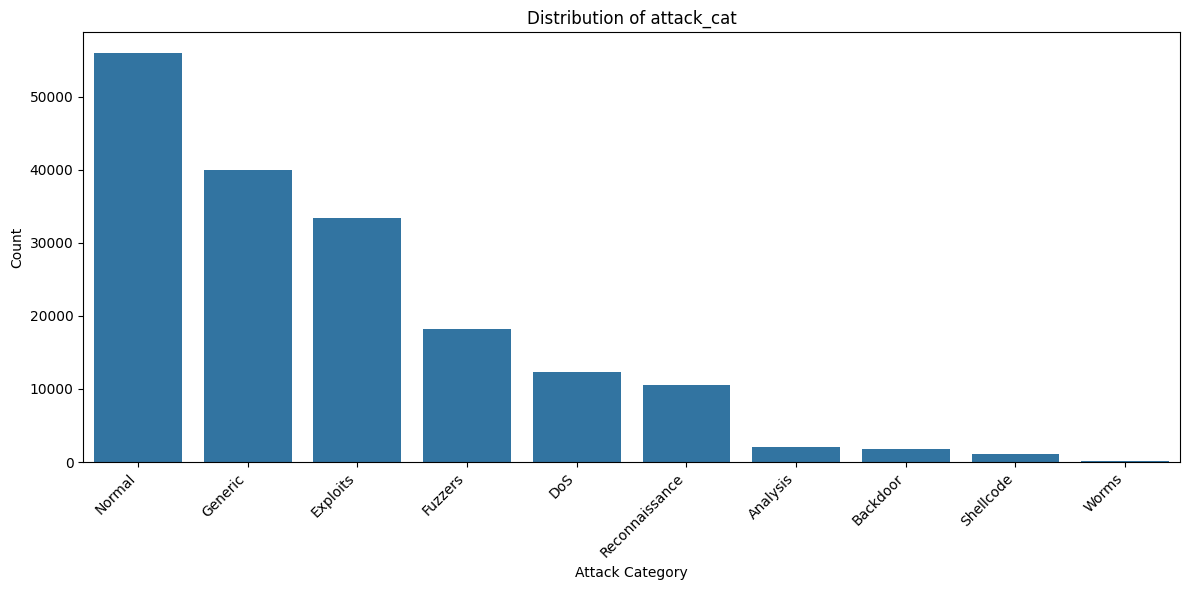

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='attack_cat', data=df)
plt.title('Distribution of attack_cat')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Karena persebaran label tidak merata, akan digunakan stratify split

#### Tambahan

##### Subplot atatck_cat_generic dengan ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm, ct_dst_sport_ltm, ct_src_dport_ltm, ct_dst_src_ltm

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
sns.boxplot(x='attack_cat', y='ct_srv_src', data=df)
plt.subplot(2, 3, 2)
sns.boxplot(x='attack_cat', y='ct_srv_dst', data=df)
plt.subplot(2, 3, 3)
sns.boxplot(x='attack_cat', y='ct_dst_ltm', data=df)
plt.subplot(2, 3, 4)
sns.boxplot(x='attack_cat', y='ct_src_ltm', data=df)
plt.subplot(2, 3, 5)
sns.boxplot(x='attack_cat', y='ct_dst_sport_ltm', data=df)
plt.subplot(2, 3, 6)
sns.boxplot(x='attack_cat', y='ct_src_dport_ltm', data=df)
plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
df = df[(df['is_ftp_login'] == 1.0) | (df['is_ftp_login'] == 0.0)]
print(df['is_ftp_login'].value_counts())

is_ftp_login
0.0    164251
1.0      2422
Name: count, dtype: int64


In [ ]:
# Ganti nilai di kolom 'is_ftp_login' dari 2.0 menjadi 1
test.loc[test['is_ftp_login'] == 2.0, 'is_ftp_login'] = 1


In [ ]:
test['is_ftp_login'].value_counts()

,count
is_ftp_login,
0.0,19296
1.0,288


In [12]:
df_train = df.sample(20000)
y  = df_train['attack_cat']
df_train.drop(['attack_cat','id'], axis=1, inplace=True)

In [19]:
# Split training set and validation set here, store into variables train_set and val_set.
X_train, X_val, y_train, y_val = train_test_split(df_train, y, test_size=0.2, random_state=42, stratify= y)

In [5]:
test.drop("id",inplace =True,axis =1)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

there is Anomali in is_ftp_login column both in test and df

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

#### Handling Missing Value Categorical Columns

In [ ]:
class MissingValueCategoricalFiller(BaseEstimator, TransformerMixin):
    def __init__(self):
      self.proto_mode_ = None

    def __fill_state(self, row):
        if pd.isnull(row['state']):
            if row['proto'] == 'icmp':
                return 'ECO'
            elif row['proto'] == 'ospf':
                return np.random.choice(['INT', 'PAR'], p=[1587/(1587+751), 751/(1587+751)])
            elif row['proto'] == 'sctp':
                return np.random.choice(['CON', 'INT'], p=[487/(487+564), 564/(487+564)])
            elif row['proto'] == 'tcp':
                return np.random.choice(['FIN', 'CON', 'PAR'], p=[70177/(70177+1061+777), 1061/(70177+1061+777), 777/(70177+1061+777)])
            elif row['proto'] == 'udp':
                return np.random.choice(['CON', 'INT', 'PAR'], p=[10191/(10191+46622+278), 46622/(10191+46622+278), 278/(10191+46622+278)])
            else:
                return 'INT'
        return row['state']

    def __fill_state_service(self, row):
        if pd.isnull(row['state']):
            if row['service'] == '-':
                return np.random.choice(['FIN', 'INT', 'CON', 'REQ'], p=[39852/(39852+38518+4913+1591), 38518/(39852+38518+4913+1591), 4913/(39852+38518+4913+1591), 1591/(39852+38518+4913+1591)])
            elif row['service'] == 'dhcp':
                return np.random.choice(['CON', 'INT'], p=[27/(27+60), 60/(27+60)])
            elif row['service'] == 'dns':
                return np.random.choice(['INT', 'CON', 'REQ'], p=[35528/(35528+6854+209), 6854/(35528+6854+209), 209/(35528+6854+209)])
            elif row['service'] == 'snmp':
                return 'INT'
            else:
                return 'FIN'
        return row['state']

    def __fill_service(self, row):
        if pd.isnull(row['service']):
            if row['proto'] == 'tcp':
                return np.random.choice(['-', 'http', 'ftp', 'ftp-data', 'pop3', 'smtp', 'ssh'], p=[41728/(41728+16869+3109+3600+1008+4553+1170), 16869/(41728+16869+3109+3600+1008+4553+1170), 3109/(41728+16869+3109+3600+1008+4553+1170), 3600/(41728+16869+3109+3600+1008+4553+1170), 1008/(41728+16869+3109+3600+1008+4553+1170), 4553/(41728+16869+3109+3600+1008+4553+1170), 1170/(41728+16869+3109+3600+1008+4553+1170)])  # TCP services
            elif row['proto'] == 'udp':
                return 'dns' if np.random.rand() < 42619 / 56811 else '-'
            else:
                return '-'
        return row['service']

    def __fill_proto_based_on_service(self, row):
        if pd.isnull(row['proto']):
            if row['service'] == 'dns':
                return 'udp'
            elif row['service'] in ['http', 'ftp', 'ftp-data', 'smtp', 'ssh', 'pop3']:
                return 'tcp'
            elif row['service'] == 'dhcp':
                return 'udp'
            elif row['service'] == '-':
                return np.random.choice(['tcp', 'udp'], p=[0.5, 0.5])
        return row['proto']

    def __fill_proto_based_on_state(self, row):
        if pd.isnull(row['proto']):
            if row['state'] in ['FIN', 'CON', 'PAR']:
                return 'tcp'
            elif row['state'] == 'ECO':
                return 'icmp'
            elif row['state'] == 'REQ':
                return 'udp'
        return row['proto']

    def fit(self, X, y=None):
        # Store the mode of proto column for later use
        self.proto_mode_ = X['proto'].mode()[0]
        return self

    def transform(self, X):
        # Make a copy to avoid modifying the original data
        X_transformed = X.copy()

        # Apply the filling functions in sequence
        X_transformed['state'] = X_transformed.apply(self.__fill_state, axis=1)
        X_transformed['state'] = X_transformed.apply(self.__fill_state_service, axis=1)
        X_transformed['service'] = X_transformed.apply(self.__fill_service, axis=1)
        X_transformed['proto'] = X_transformed.apply(self.__fill_proto_based_on_service, axis=1)
        X_transformed['proto'] = X_transformed.apply(self.__fill_proto_based_on_state, axis=1)

        # Fill remaining proto nulls with mode
        X_transformed['proto'] = X_transformed['proto'].fillna(self.proto_mode_)

        return X_transformed

#### Handling Missing Value Numerical Columns

In [ ]:
class MissingValueNumericalFiller(BaseEstimator, TransformerMixin):

    def __init__(self, column_pairs=None):
        """
        Parameters:
        -----------
        column_pairs : list of tuples
            List of column pairs to process. If None, uses default pairs.
        """
        self.column_pairs = column_pairs if column_pairs is not None else [
            ('spkts', 'sbytes'),
            ('dpkts', 'dbytes'),
            ('spkts', 'sloss'),
            ('dpkts', 'dloss'),
            ('ct_srv_dst', 'ct_dst_src_ltm'),
            ('ct_srv_src', 'ct_srv_dst'),
            ('ct_dst_ltm', 'ct_src_dport_ltm'),
            ('ct_src_ltm', 'ct_src_dport_ltm'),
            ('ct_src_dport_ltm', 'ct_dst_ltm'),
            ('ct_dst_sport_ltm', 'ct_src_dport_ltm'),
            ('ct_dst_src_ltm', 'ct_srv_dst'),
            ('tcprtt', 'ackdat'),
            ('tcprtt', 'synack'),
            ('sjit', 'dinpkt')
        ]
        self.mean_values_ = {}
        self.mean_ratios_ = {}

    def fit(self, X, y=None):
        """
        Compute the mean values and ratios from the training data.

        Parameters:
        -----------
        X : pandas DataFrame
        y : ignored

        Returns:
        --------
        self
        """
        # Store mean values for each column
        for col1, col2 in self.column_pairs:
            self.mean_values_[col1] = X[col1].mean()
            self.mean_values_[col2] = X[col2].mean()

            # Calculate and store mean ratio for each pair
            temp_df = X.copy()
            temp_df[col2] = temp_df[col2].replace(0, self.mean_values_[col2])
            ratio = temp_df[col1] / temp_df[col2]
            self.mean_ratios_[(col1, col2)] = ratio.dropna().mean()

        return self

    def transform(self, X):
        """
        Fill missing values using the computed ratios.

        Parameters:
        -----------
        X : pandas DataFrame

        Returns:
        --------
        pandas DataFrame
        """
        X_transformed = X.copy()

        for col1, col2 in self.column_pairs:
            # Fill missing values when both columns are NaN
            mask_both_nan = X_transformed[col1].isna() & X_transformed[col2].isna()
            X_transformed.loc[mask_both_nan, col1] = self.mean_values_[col1]
            X_transformed.loc[mask_both_nan, col2] = self.mean_values_[col2]

            # Replace zeros in col2 to avoid division by zero
            X_transformed[col2] = X_transformed[col2].replace(0, self.mean_values_[col2])

            # Fill missing values using ratios
            mean_ratio = self.mean_ratios_[(col1, col2)]

            # Fill col1 if missing (using col2 * mean_ratio)
            mask_col1_nan = X_transformed[col1].isna() & X_transformed[col2].notna()
            X_transformed.loc[mask_col1_nan, col1] = X_transformed.loc[mask_col1_nan, col2] * mean_ratio

            # Fill col2 if missing (using col1 / mean_ratio)
            mask_col2_nan = X_transformed[col2].isna() & X_transformed[col1].notna()
            X_transformed.loc[mask_col2_nan, col2] = X_transformed.loc[mask_col2_nan, col1] / mean_ratio

        return X_transformed

    def get_feature_names_out(self, feature_names=None):
        """
        Get output feature names for transformation.

        Parameters:
        -----------
        feature_names : list of string or None

        Returns:
        --------
        list of string
        """
        return feature_names if feature_names is not None else []




#### Handling Missing Other Features

In [ ]:
class MissingValueOtherFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean_imputer = SimpleImputer(strategy='mean')
        self.mean_sinpkt_1 = None
        self.mean_sinpkt_0 = None

    def fit(self, X, y=None):
        # Hitung rata-rata untuk sinpkt berdasarkan is_sm_ips_ports
        self.mean_sinpkt_1 = X.loc[X['is_sm_ips_ports'] == 1.0, 'sinpkt'].mean()
        self.mean_sinpkt_0 = X.loc[X['is_sm_ips_ports'] == 0.0, 'sinpkt'].mean()

        # Fit SimpleImputer untuk kolom lain yang menggunakan mean
        self.mean_imputer.fit(X[['dur', 'sload', 'dload', 'ct_flw_http_mthd', 'is_ftp_login',
                                 'ct_ftp_cmd', 'stcpb', 'dtcpb', 'smean', 'dmean',
                                 'trans_depth', 'response_body_len', 'djit']])
        return self

    def transform(self, X):
        # Buat salinan data untuk diubah
        X = X.copy()

        # Imputasi nilai kosong sesuai logika
        X.loc[X['swin'].isna() & X['dttl'].isna(), ['swin', 'dttl']] = [0.0, 0.0]
        X.loc[X['dttl'].isna() & (X['swin'] == 0.0), 'dttl'] = 0.0
        X.loc[X['dttl'].isna() & (X['swin'] == 255.0), 'dttl'] = 252.0
        X.loc[X['dttl'].isna() & (~X['swin'].isin([0.0, 255.0])), 'dttl'] = 0.0
        X.loc[X['swin'].isna() & (X['dttl'] == 0.0), 'swin'] = 0.0
        X.loc[X['swin'].isna() & (X['dttl'] == 252.0), 'swin'] = 255.0
        X.loc[X['swin'].isna() & (X['dttl'] == 29.0), 'swin'] = 255.0
        X.loc[X['swin'].isna() & (~X['dttl'].isin([0.0, 252.0, 29.0])), 'swin'] = 0.0

        X.loc[X['dwin'].isna() & (X['dttl'] == 0.0), 'dwin'] = 0.0
        X.loc[X['dwin'].isna() & (X['dttl'] == 252.0), 'dwin'] = 255.0
        X.loc[X['dwin'].isna() & (X['dttl'] == 29.0), 'dwin'] = 255.0
        X.loc[X['dwin'].isna() & (~X['dttl'].isin([0.0, 252.0, 29.0])), 'dwin'] = 0.0

        X.loc[X['ct_state_ttl'].isna() & X['sttl'].isna(), ['ct_state_ttl', 'sttl']] = [2.0, 254.0]
        X.loc[X['ct_state_ttl'].isna() & (X['sttl'] == 254.0), 'ct_state_ttl'] = 2.0
        X.loc[X['ct_state_ttl'].isna() & (X['sttl'] == 31.0), 'ct_state_ttl'] = 0.0
        X.loc[X['ct_state_ttl'].isna() & (X['sttl'] == 62.0), 'ct_state_ttl'] = 1.0
        X.loc[X['ct_state_ttl'].isna() & (X['sttl'] == 0.0), 'ct_state_ttl'] = 2.0
        X.loc[X['ct_state_ttl'].isna(), 'ct_state_ttl'] = 2.0
        X.loc[X['sttl'].isna() & (X['ct_state_ttl'] == 2.0), 'sttl'] = 254.0
        X.loc[X['sttl'].isna() & (X['ct_state_ttl'] == 0.0), 'sttl'] = 31.0
        X.loc[X['sttl'].isna() & (X['ct_state_ttl'] == 1.0), 'sttl'] = 62.0
        X.loc[X['sttl'].isna(), 'sttl'] = 254.0

        X.loc[X['is_sm_ips_ports'].isna() & X['sinpkt'].isna(), ['is_sm_ips_ports', 'sinpkt']] = [0.0, 122]
        X.loc[X['sinpkt'].isna() & (X['is_sm_ips_ports'] == 1.0), 'sinpkt'] = self.mean_sinpkt_1
        X.loc[X['sinpkt'].isna() & (X['is_sm_ips_ports'] == 0.0), 'sinpkt'] = self.mean_sinpkt_0
        X.loc[X['is_sm_ips_ports'].isna() & (X['sinpkt'] >= 40000), 'is_sm_ips_ports'] = 1.0
        X.loc[X['is_sm_ips_ports'].isna() & (X['sinpkt'] < 40000), 'is_sm_ips_ports'] = 0.0

        binary_columns = ['label', 'is_ftp_login', 'is_sm_ips_ports']
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        non_binary_columns = [col for col in numeric_cols if col not in binary_columns]

        # Tangani outlier untuk kolom numerik non-biner
        for feat in non_binary_columns:
            Q1, Q3 = df[feat].quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Clipping nilai outlier
            df[feat] = np.clip(df[feat], lower_bound, upper_bound)

        binary_columns = ['is_sm_ips_ports', 'is_ftp_login']

        for col in binary_columns:
            df.loc[~df[col].isin([0, 1]), col] = 0

        # Terapkan imputasi rata-rata pada kolom lainnya
        X[['dur', 'sload', 'dload', 'ct_flw_http_mthd', 'is_ftp_login',
           'ct_ftp_cmd', 'stcpb', 'dtcpb', 'smean', 'dmean',
           'trans_depth', 'response_body_len', 'djit']] = self.mean_imputer.transform(
               X[['dur', 'sload', 'dload', 'ct_flw_http_mthd', 'is_ftp_login',
                  'ct_ftp_cmd', 'stcpb', 'dtcpb', 'smean', 'dmean',
                  'trans_depth', 'response_body_len', 'djit']])

        return X

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
df.duplicated().any()

False

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

#### Feature Engineering


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class NetworkFeaturesTransformer(BaseEstimator, TransformerMixin):
    """
    A custom transformer for creating advanced network traffic features.

    This transformer engineers new features from network traffic data to help detect
    various types of network attacks including DoS, Reconnaissance, Worms, etc.

    The transformer creates the following feature combinations:
    - Packet rate (packets per second)
    - System load difference between source and destination
    - Data loss ratio
    - Total system load per second
    - Packet count differences and totals
    - Total jitter
    - SYN/ACK ratio for TCP connections

    Parameters
    ----------
    epsilon : float, default=1e-9
        Small constant added to denominators to prevent division by zero

    Attributes
    ----------
    feature_names_ : list
        Names of the engineered features
    """

    def __init__(self, epsilon=1e-9):
        self.epsilon = epsilon

    def fit(self, X, y=None):
        """
        Fit the transformer (no actual fitting needed for this transformer).

        Parameters
        ----------
        X : pandas.DataFrame
            Input features containing network traffic data
        y : None
            Ignored

        Returns
        -------
        self : object
            Returns self
        """
        # Store feature names that will be created
        self.feature_names_ = [
            'pkt_rate',
            'load_diff',
            'loss_ratio',
            'total_load_per_second',
            'pkt_diff',
            'pkt_total',
            'total_jitter',
            'syn_ack_ratio'
        ]
        return self

    def transform(self, X):
        """
        Transform the input data by creating new network traffic features.

        Parameters
        ----------
        X : pandas.DataFrame
            Input features containing network traffic data
            Required columns: ['spkts', 'dpkts', 'dur', 'sload', 'dload',
                             'sloss', 'dloss', 'sjit', 'djit', 'synack', 'tcprtt']

        Returns
        -------
        pandas.DataFrame
            Transformed data with engineered features
        """
        # Create a copy to avoid modifying the input data
        X_transformed = pd.DataFrame()

        # 1. Packet Rate Feature (for DoS/Fuzzer detection)
        # Calculates total packets per second
        X_transformed['pkt_rate'] = (X['spkts'] + X['dpkts']) / (X['dur'] + self.epsilon)

        # 2. System Load Difference (for Reconnaissance/Exploit detection)
        # Captures load imbalance between source and destination
        X_transformed['load_diff'] = X['sload'] - X['dload']

        # 3. Loss Ratio Feature (for Worm/Backdoor detection)
        # Measures data loss asymmetry
        X_transformed['loss_ratio'] = X['sloss'] / (X['dloss'] + self.epsilon)

        # 4. Total Load per Second (for DoS/Generic attack detection)
        # Measures system stress over time
        X_transformed['total_load_per_second'] = (X['sload'] + X['dload']) / (X['dur'] + self.epsilon)

        # 5. Packet Count Features (for Fuzzer/Reconnaissance detection)
        # Analyzes packet distribution patterns
        X_transformed['pkt_diff'] = X['spkts'] - X['dpkts']
        X_transformed['pkt_total'] = X['spkts'] + X['dpkts']

        # 6. Jitter Feature (for Worm/Shellcode detection)
        # Measures timing irregularities
        X_transformed['total_jitter'] = X['sjit'] + X['djit']

        # 7. TCP SYN/ACK Ratio (for Exploit/Backdoor detection)
        # Analyzes TCP handshake patterns
        X_transformed['syn_ack_ratio'] = X['synack'] / (X['tcprtt'] + self.epsilon)

        return X_transformed

    def get_feature_names(self):
        """
        Get names of the engineered features.

        Returns
        -------
        list
            Names of the transformed features
        """
        return self.feature_names_

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [20]:
#emery pipeline
# swin dan dwin tidak memiliki arti secara value, ini hanya nomor port
sp_cols = ['swin','dwin']
num_cols= list(df_train.select_dtypes(include=np.number))

cat_cols = list(df_train.select_dtypes(include='object'))
all_cols = list(df_train.columns)



cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('OHE', OneHotEncoder(handle_unknown='ignore',sparse_output = False)),

])
num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

preprocessor = ColumnTransformer(
    transformers = [
    ('cat_transformer', cat_transformer,cat_cols),
    ('num_transformer', num_transformer, num_cols)
    ]
)

In [15]:
# num_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())

#     # Imputasi nilai median
# ])

# Preprocessing untuk kolom kategorikal
cat_transformer = Pipeline(steps=[
    ('OE',  OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))


])

# Gabungkan preprocessing
preprocessor2 = ColumnTransformer(
    transformers=[
        # ('num', num_transformer, num_cols),  # Preprocessing numerik
        ('cat', cat_transformer, cat_cols)  # Preprocessing kategorikal
    ]
)

In [21]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

In [16]:
le= LabelEncoder()
y_train= le.fit_transform(y_train)
y_val= le.transform(y_val)

# AutoEncoder

In [ ]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [ ]:
X = df_train

In [ ]:
print(df_train.shape[0])

110000


In [ ]:
print(len(y))

110000


In [ ]:

X_train_preprocessed = preprocessor2.fit_transform(X_train)
X_test_preprocessed = preprocessor2.transform(X_val)

# Buat nama kolom manual
num_features = X_train_preprocessed.shape[1]  # Jumlah total kolom setelah transformasi
feature_names = [f'fitur_{i+1}' for i in range(num_features)]  # Nama fitur: fitur_1, fitur_2, ...

# Buat DataFrame hasil transformasi
X_train_scaled = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_preprocessed, columns=feature_names)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (88000, 191)
X_test_scaled shape: (22000, 191)


In [ ]:
class AutoEncoders(Model):
  def __init__(self, output_units):
    super().__init__()
    self.encoder = Sequential(
        [   Dense(156,activation = 'relu'),
            Dense(128, activation = 'relu'),
        ]
    )
    self.decoder = Sequential(
        [

          Dense(156,activation= "relu"),
          Dense(output_units, activation="tanh")
        ]
    )
  def call(self, inputs):
      encoded = self.encoder(inputs)
      decoded = self.decoder(encoded)
      return decoded

In [ ]:
ae = AutoEncoders(len(X_train_scaled.columns))


In [ ]:
ae.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

history = ae.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_scaled, X_test_scaled)
)

Epoch 1/10
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1427 - mae: 0.1427 - val_loss: 0.1315 - val_mae: 0.1315
Epoch 2/10
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1315 - mae: 0.1315 - val_loss: 0.1314 - val_mae: 0.1314
Epoch 3/10
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1316 - mae: 0.1316 - val_loss: 0.1314 - val_mae: 0.1314
Epoch 4/10
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1313 - mae: 0.1313 - val_loss: 0.1314 - val_mae: 0.1314
Epoch 5/10
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1314 - mae: 0.1314 - val_loss: 0.1314 - val_mae: 0.1314
Epoch 6/10
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1314 - mae: 0.1314 - val_loss: 0.1314 - val_mae: 0.1314
Epoch 7/10
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1313 - mae: 0.1313 - val_loss: 0.1314 - val_mae: 0.1314
Epoch 8/10
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1312 - mae: 0.1312 - val_loss: 0.1314 - val_mae: 0.1314
Epoch 9/10
2750/2750 ━━━━━━━━━━━━━━━━━━━

In [ ]:
encoder_layer = ae.get_layer('sequential_14')
ae_reduced_df = pd.DataFrame(encoder_layer.predict(X_train_scaled))
ae_reduced_df = ae_reduced_df.add_prefix('feature_')

2750/2750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
ae_val_df = pd.DataFrame(encoder_layer.predict(X_test_scaled))
ae_val_df = ae_val_df.add_prefix('feature_')

688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
dtl = DecisionTreeClassifier(criterion = "entropy")
dtl.fit(ae_reduced_df,y_train)
y_pred_dtl= dtl.predict(ae_val_df)
print(classification_report(y_val,y_pred_dtl))

                precision    recall  f1-score   support

      Analysis       0.08      0.08      0.08       252
      Backdoor       0.04      0.04      0.04       217
           DoS       0.27      0.30      0.28      1550
      Exploits       0.59      0.60      0.59      4203
       Fuzzers       0.52      0.49      0.50      2281
       Generic       0.98      0.97      0.98      5030
        Normal       0.87      0.87      0.87      7011
Reconnaissance       0.60      0.55      0.57      1297
     Shellcode       0.23      0.22      0.23       143
         Worms       0.09      0.12      0.11        16

      accuracy                           0.72     22000
     macro avg       0.43      0.42      0.42     22000
  weighted avg       0.72      0.72      0.72     22000



In [ ]:
sub_df = pd.DataFrame(preprocessor2.transform(X_test),columns = feature_names)
X_sub = pd.DataFrame(encoder_layer.predict(sub_df))

644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:

y_sub = dtl.predict(X_sub)
submission = pd.DataFrame({
    'id' : np.arange(len(y_sub)),
    'label' : y_sub
})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
submission.to_csv('submission_ae_dtl_last2.csv', index = False)

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

In [ ]:
import pickle

## A. KNN

#### Model from scratch

In [ ]:
!wget https://raw.githubusercontent.com/AlthariqFairuz/Tubes2-AI/refs/heads/main/src/KNN.py

--2024-12-15 13:07:04--  https://raw.githubusercontent.com/AlthariqFairuz/Tubes2-AI/refs/heads/main/src/KNN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2788 (2.7K) [text/plain]
Saving to: ‘KNN.py’

KNN.py              100%[===================>]   2.72K  --.-KB/s    in 0s      

2024-12-15 13:07:05 (41.5 MB/s) - ‘KNN.py’ saved [2788/2788]



In [ ]:
from KNN import KNNeighbours

In [ ]:
knn_data= X_train_transformed[:10000]
knn_data_label= y_train[:10000]

knn_test= X_val_transformed[:1000]
knn_test_label= y_val[:1000]

In [ ]:
knn_scratch= KNNeighbours(k=5)
knn_scratch.fit(knn_data,knn_data_label)
y_pred= knn_scratch.predict(knn_test)

f1_macro_scratch = f1_score(knn_test_label,y_pred,average ='macro')
print(f'F1 Macro Average: {f1_macro_scratch}')

              precision    recall  f1-score   support

           0       0.20      0.08      0.12        12
           1       0.00      0.00      0.00        11
           2       0.33      0.31      0.32        74
           3       0.58      0.74      0.65       189
           4       0.46      0.49      0.48        90
           5       0.99      0.98      0.99       235
           6       0.90      0.87      0.89       313
           7       0.69      0.49      0.58        69
           8       0.50      0.14      0.22         7

    accuracy                           0.75      1000
   macro avg       0.52      0.46      0.47      1000
weighted avg       0.74      0.75      0.74      1000



In [ ]:
with open('knn_scartch.pkl', 'wb') as file:
    pickle.dump(knn_scratch, file)

#### Built-in scikit learn

In [ ]:
knn= KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)

knn.fit(knn_data, knn_data_label)
y_pred= knn.predict(knn_test)

f1_macro_scratch = f1_score(knn_test_label, y_pred,average ='macro')
print(f'F1 Macro Average: {f1_macro_scratch}')

              precision    recall  f1-score   support

           0       0.20      0.08      0.12        12
           1       0.00      0.00      0.00        11
           2       0.31      0.30      0.31        74
           3       0.58      0.73      0.64       189
           4       0.46      0.49      0.48        90
           5       0.99      0.98      0.99       235
           6       0.90      0.87      0.89       313
           7       0.69      0.49      0.58        69
           8       0.50      0.14      0.22         7

    accuracy                           0.74      1000
   macro avg       0.52      0.45      0.47      1000
weighted avg       0.74      0.74      0.74      1000



In [ ]:
with open('knn.pkl', 'wb') as file:
    pickle.dump(knn, file)

## B. Naive Bayes

#### Model from scratch

In [ ]:
!wget https://raw.githubusercontent.com/AlthariqFairuz/Tubes2-AI/refs/heads/main/src/GNB.py

--2024-12-15 13:31:23--  https://raw.githubusercontent.com/AlthariqFairuz/Tubes2-AI/refs/heads/main/src/GNB.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2619 (2.6K) [text/plain]
Saving to: ‘GNB.py’

GNB.py              100%[===================>]   2.56K  --.-KB/s    in 0s      

2024-12-15 13:31:23 (27.3 MB/s) - ‘GNB.py’ saved [2619/2619]



In [ ]:
from GNB import GaussianNaiveBayes

In [ ]:
gnb_scratch= GaussianNaiveBayes()
gnb_scratch.fit(X_train_transformed, y_train)
y_pred= gnb_scratch.predict(X_val_transformed)

f1_macro_scratch = f1_score(y_val,y_pred,average ='macro')
print(f'F1 Macro Average: {f1_macro_scratch}')

F1 Macro Average: 0.15689196303232086


In [ ]:
with open('gnb_scratch.pkl', 'wb') as file:
    pickle.dump(gnb_scratch, file)

#### Built-in scikit-learn

In [ ]:
gnb= GaussianNB()
gnb.fit(X_train_transformed, y_train)
y_pred= gnb.predict(X_val_transformed)

f1_macro_sklearn = f1_score(y_val,y_pred,average ='macro')
print(f'F1 Macro Average: {f1_macro_sklearn}')

F1 Macro Average: 0.21145610600630813


In [ ]:
with open('gnb.pkl', 'wb') as file:
    pickle.dump(gnb, file)

## C. ID3

#### Model from scratch

In [6]:
!wget https://raw.githubusercontent.com/AlthariqFairuz/Tubes2-AI/refs/heads/main/src/DecisionTree.py

--2024-12-15 15:14:51--  https://raw.githubusercontent.com/AlthariqFairuz/Tubes2-AI/refs/heads/main/src/DecisionTree.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6395 (6.2K) [text/plain]
Saving to: ‘DecisionTree.py.3’

DecisionTree.py.3   100%[===================>]   6.25K  --.-KB/s    in 0s      

2024-12-15 15:14:51 (76.2 MB/s) - ‘DecisionTree.py.3’ saved [6395/6395]



In [7]:
from DecisionTree import DecisionTree

In [ ]:
dt_data= X_train_transformed[:1000]
dt_data_label= y_train[:1000]

dt_test= X_val_transformed[:100]
dt_test_label= y_val[:100]

In [ ]:
dt_scratch= DecisionTree(mode='entropy')
dt_scratch.fit(dt_data, dt_data_label)
y_pred= dt_scratch.predict(dt_test)

f1_macro_scratch = f1_score(dt_test_label,y_pred,average ='macro')
print(f'F1 Macro Average: {f1_macro_scratch}')

F1 Macro Average: 0.4820763561551082


In [ ]:
with open('dt_scratch.pkl', 'wb') as file:
    pickle.dump(dt_scratch, file)

#### Built-in scikit-learn

In [ ]:
dt= DecisionTreeClassifier(criterion = "entropy", max_depth= None, min_samples_leaf=4)
dt.fit(dt_data, dt_data_label)
y_pred= dt.predict(dt_test)

f1_macro_sklearn = f1_score(dt_test_label,y_pred,average ='macro')
print(f'F1 Macro Average: {f1_macro_sklearn}')

F1 Macro Average: 0.4704355314133676


In [ ]:
with open('dt.pkl', 'wb') as file:
    pickle.dump(dt, file)

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
print(classification_report(knn_test_label,y_pred))

In [ ]:
# Type your code here
print(classification_report(dt_test_label,y_pred))

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [22]:
df_dt = df.dropna()
df_dt.shape[0]

X_dt = df_dt.drop(['attack_cat','id'],axis =1)
y_dt = df_dt['attack_cat']


In [ ]:

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = oe.fit_transform(X_dt)  # Sparse matrix
X_test_encoded = oe.transform(test)       # Sparse matrix untuk test
dt = DecisionTree(mode='entropy')
dt_spipeline = Pipeline(steps = [
    ('pp', preprocessor),
    ('dt', dt)
])
# Gabungkan pipeline secara manual

dt_spipeline.fit(X_dt, y_dt)  # Konversi ke dense hanya untuk fit

# Prediksi
y_pred = dt_spipeline.predict(test)  # Konversi ke dense hanya untuk predict

print("Predictions:", y_pred)

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`

1. model saya cenderung memprediksi kelas yang dominan seperti normal
2. dtl perform paling baik karena robust terhadap outlier
3. ya karena banyak dari model tidak bisa menghandle missing data secara langsung dan juga missing data dapat menyebabkan noise
4. ya karena dengan fitur memiliki skala yang sama, maka model tidak cenderung fokus terhadap beberapa fitur saja. Ini sangat pentig terutama dengan model berbasis jarak seperti KNN